In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set({"figure.figsize": (10,10)})

In [2]:
# Loading the data and looking through the first five rows of the data
app_energy = pd.read_csv(r"C:\Users\user\Downloads\energydata_complete.csv")
app_energy.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [3]:
# A look at the last five rows of the data
app_energy.tail()

date  Appliances  lights         T1       RH_1  \
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3    T4  ...    T9     RH_9  \
19730  25.890000  42.025714  27.200000  41.163333  24.7  ...  23.2  46.7900   
19731  25.754000  42.080000  27.133333  41.223333  24.7  ...  23.2  46.7900   
19732  25.628571  42.768571  27.050000  41.690000  24.7  ...  23.2  46.7900   
19733  25.414000  43.036000  26.890000  41.290000  24.7  ...  23.2  46.8175   
19734  25.264286  42.971429  26.823333  41.156667  24.7  ...  23.2  46.8450   

           T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
19730  22.733333        755.2  55.666667   3.333333   23.666667  13.333333   
19731  22.600000        755.2  56.000000   3.500000   24.500000  13.300000   
19732  22.466667        755.2  56.333333   3.666667   25.333333  13.266667   
19733  22.333333        755.2  56.666667   3.833333   26.166667  13.233333   
19734  22.200000        755.2  57.000000   4.000000   27.000000  13.200000   

             rv1        rv2  
19730  43.096812  43.096812  
19731  49.282940  49.282940  
19732  29.199117  29.199117  
19733   6.322784   6.322784  
19734  34.118851  34.118851  

[5 rows x 29 columns]

In [4]:
# Looking through the information of the dataset, dtypes of columns, number of instances, number of columns, size of dataset etc.
app_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
# Looking at statistical aspects of each numeric column respectively to make immediate inferences of the data.
app_energy.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [6]:
# Dropping redundant columns; date and lights as required of us from the instructions
app_energy = app_energy.drop(columns = ["date","lights"])
app_energy.head()

Appliances     T1       RH_1    T2       RH_2     T3       RH_3         T4  \
0          60  19.89  47.596667  19.2  44.790000  19.79  44.730000  19.000000   
1          60  19.89  46.693333  19.2  44.722500  19.79  44.790000  19.000000   
2          50  19.89  46.300000  19.2  44.626667  19.79  44.933333  18.926667   
3          50  19.89  46.066667  19.2  44.590000  19.79  45.000000  18.890000   
4          60  19.89  46.333333  19.2  44.530000  19.79  45.000000  18.890000   

        RH_4         T5  ...         T9   RH_9     T_out  Press_mm_hg  RH_out  \
0  45.566667  17.166667  ...  17.033333  45.53  6.600000        733.5    92.0   
1  45.992500  17.166667  ...  17.066667  45.56  6.483333        733.6    92.0   
2  45.890000  17.166667  ...  17.000000  45.50  6.366667        733.7    92.0   
3  45.723333  17.166667  ...  17.000000  45.40  6.250000        733.8    92.0   
4  45.530000  17.200000  ...  17.000000  45.40  6.133333        733.9    92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  
0   7.000000   63.000000        5.3  13.275433  13.275433  
1   6.666667   59.166667        5.2  18.606195  18.606195  
2   6.333333   55.333333        5.1  28.642668  28.642668  
3   6.000000   51.500000        5.0  45.410389  45.410389  
4   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 27 columns]

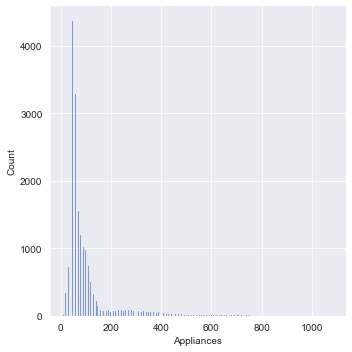

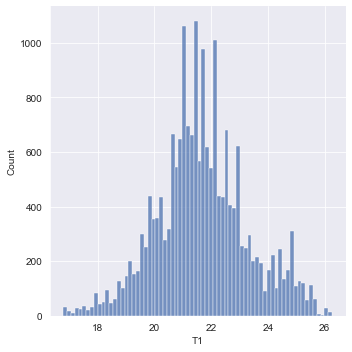

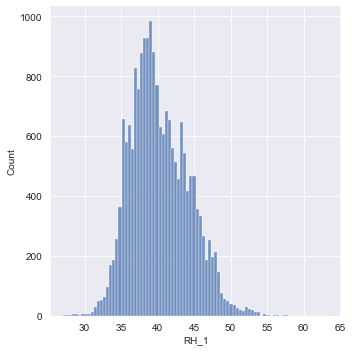

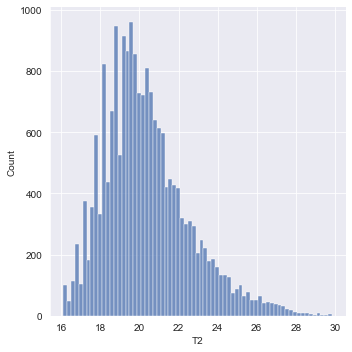

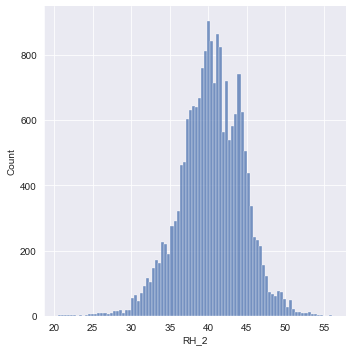

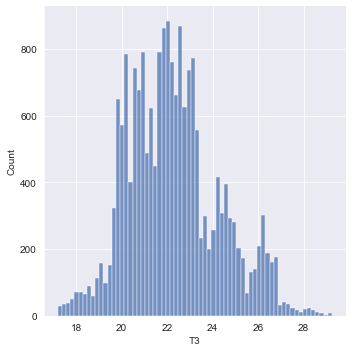

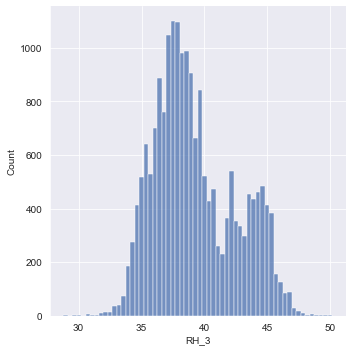

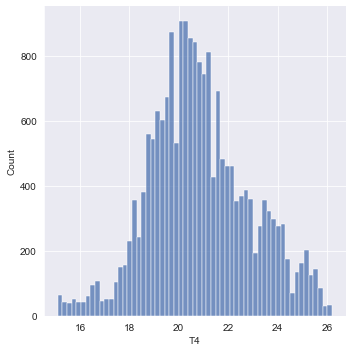

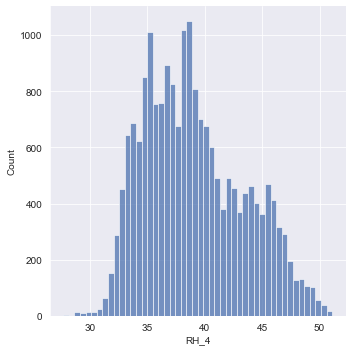

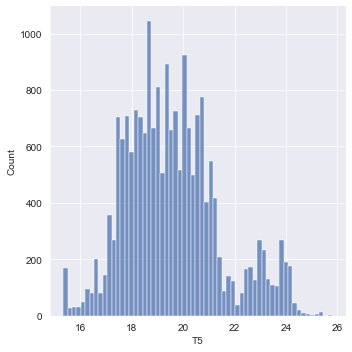

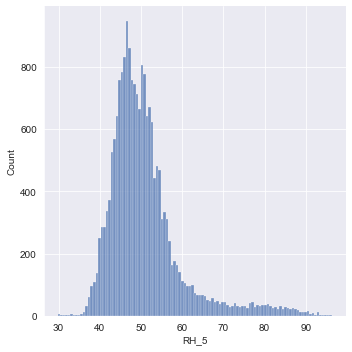

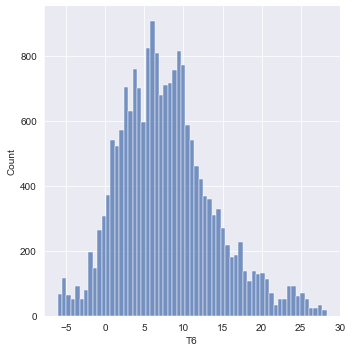

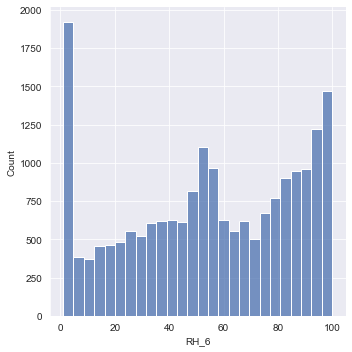

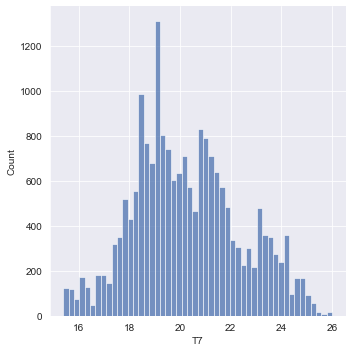

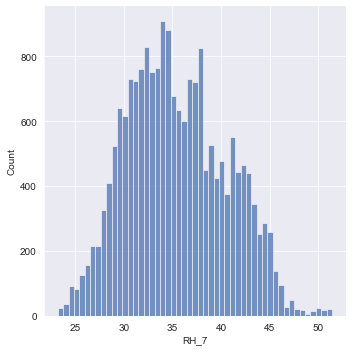

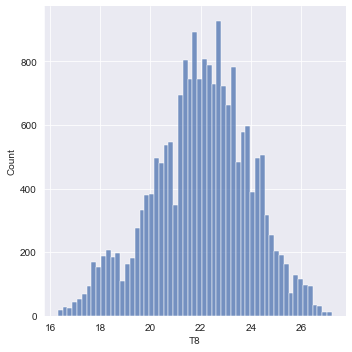

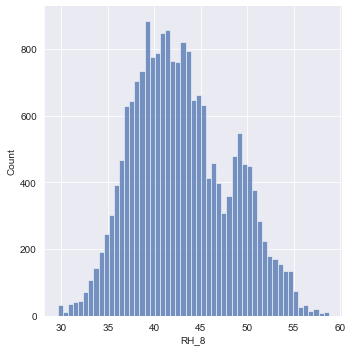

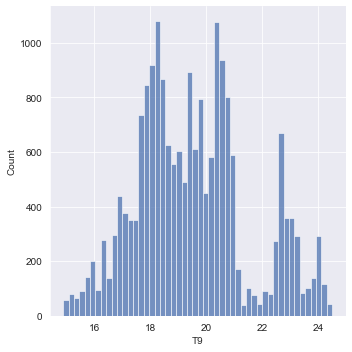

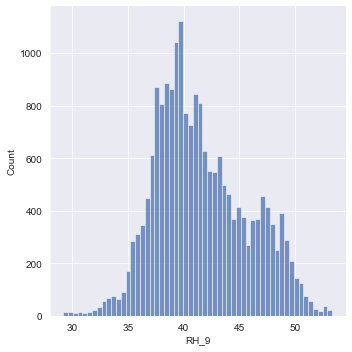

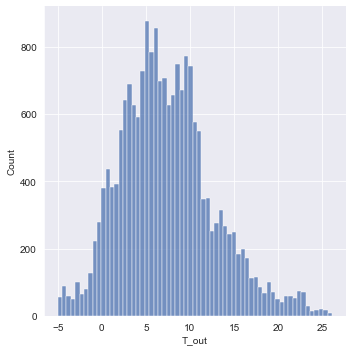

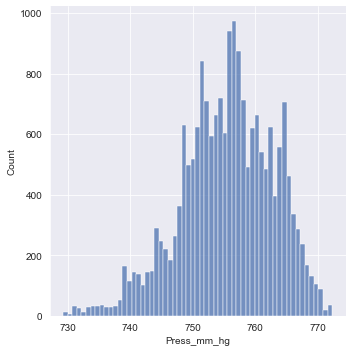

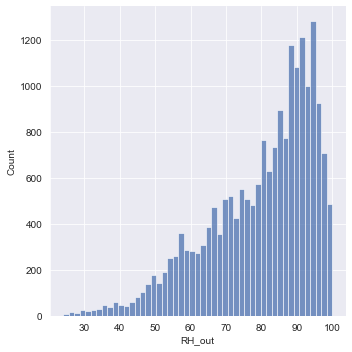

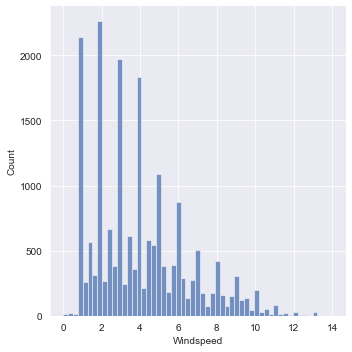

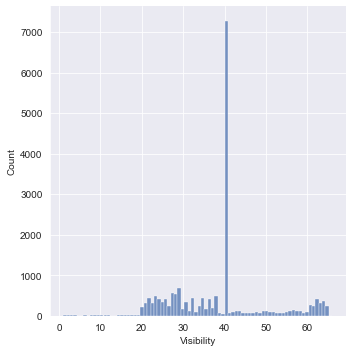

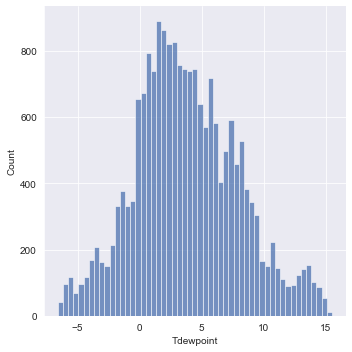

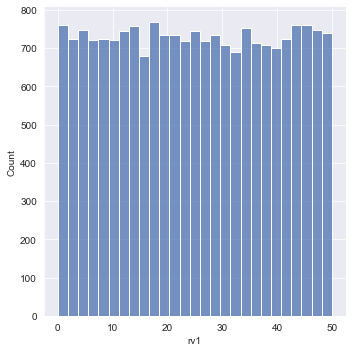

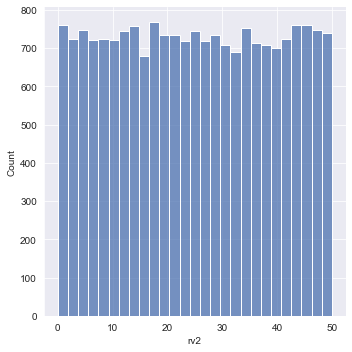

In [7]:
# Carrying out univariate analysis, looking at the distribution of each column and the frequency class of certain values.
# From the graphs, we can infer that there is almost a gaussian distribution for most columns with a few having some skewness
for i in app_energy.columns:
    sns.displot(x = i, data = app_energy)

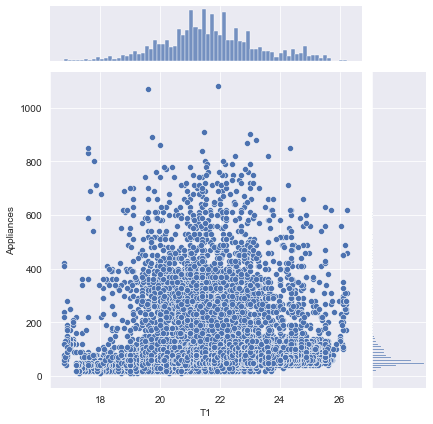

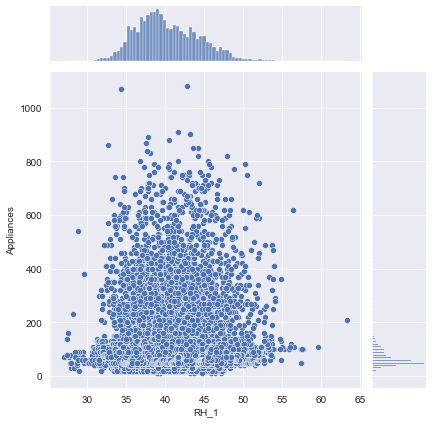

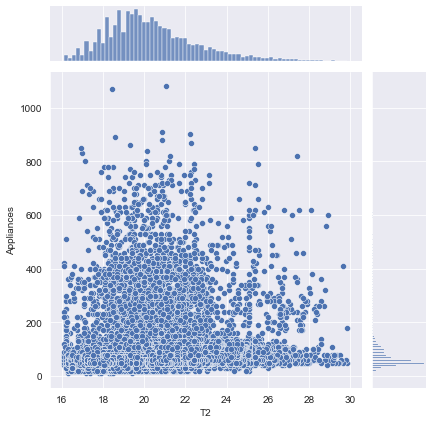

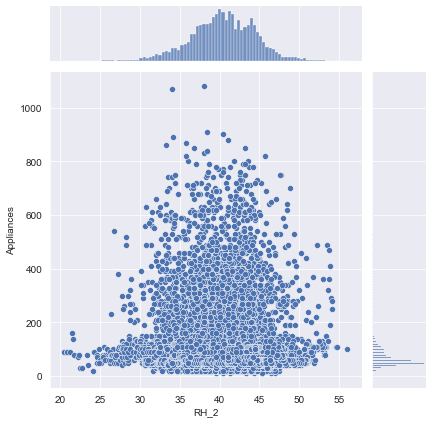

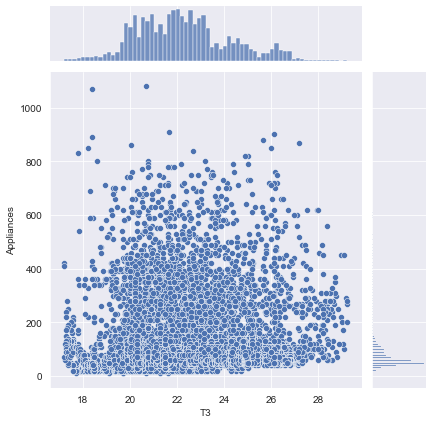

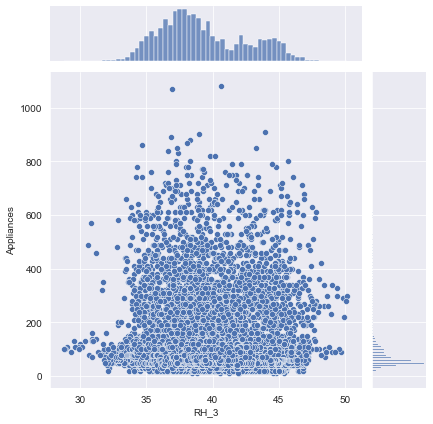

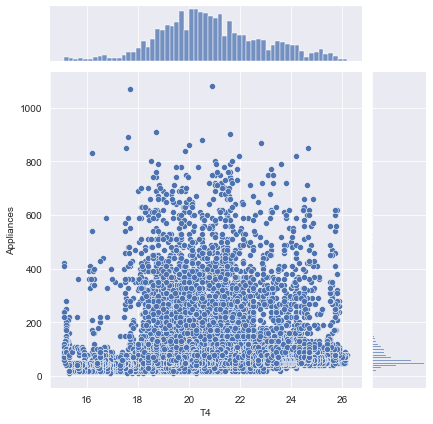

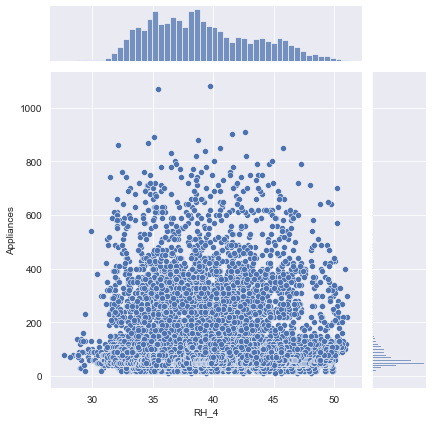

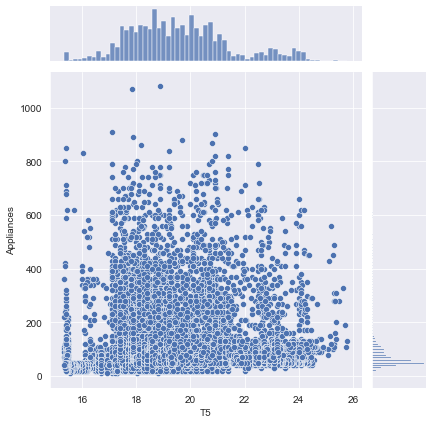

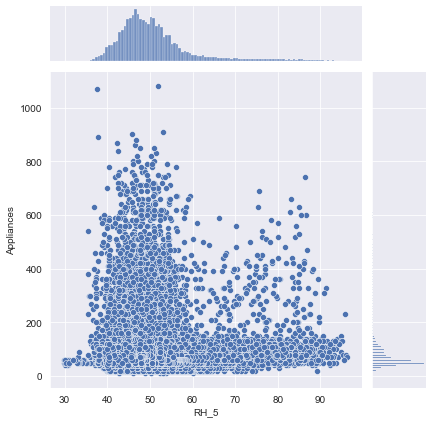

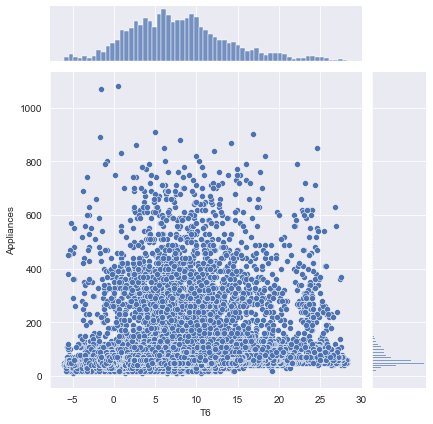

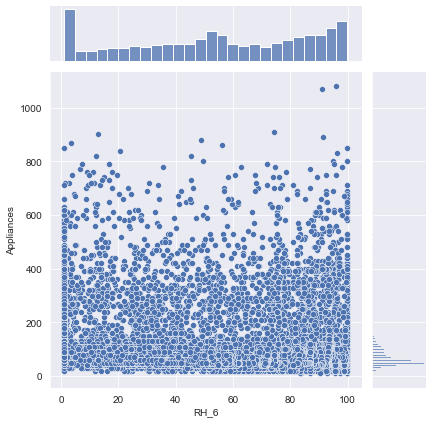

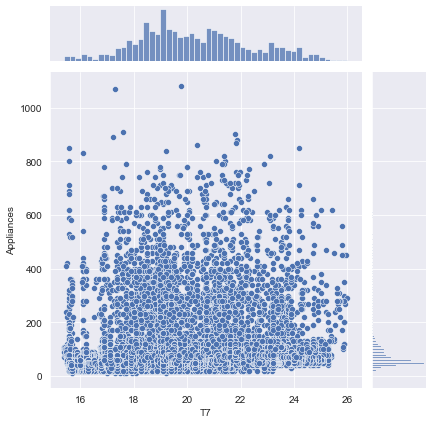

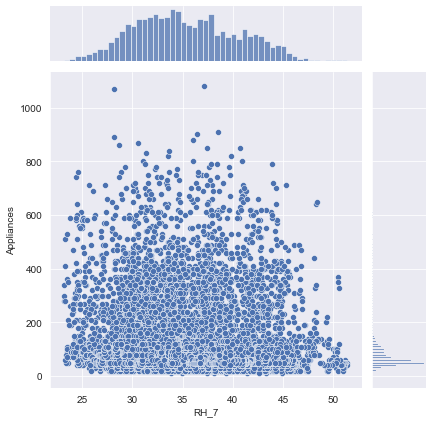

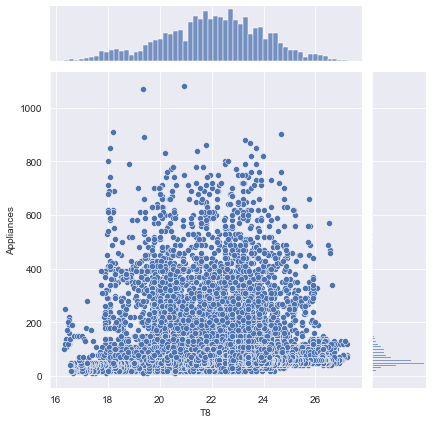

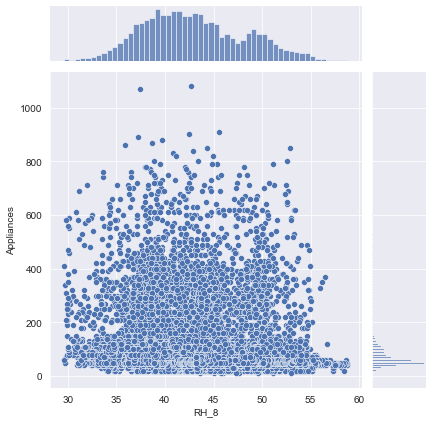

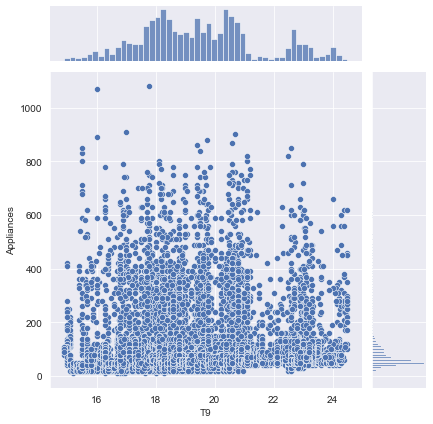

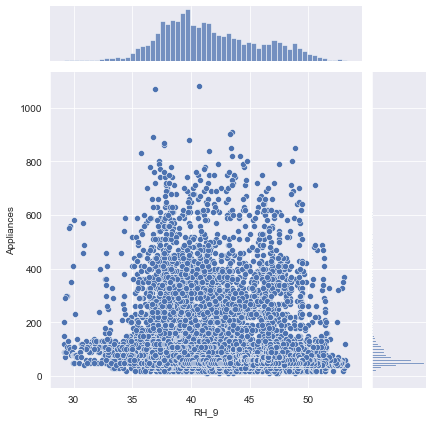

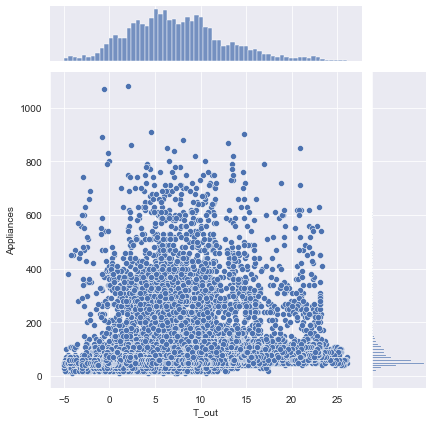

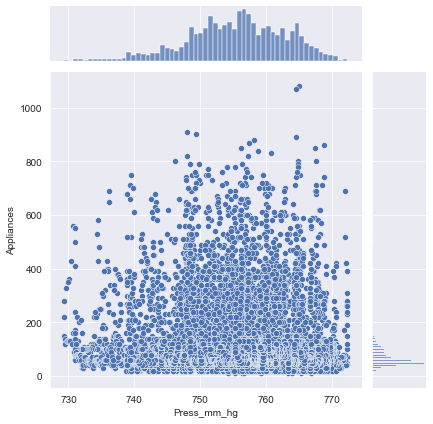

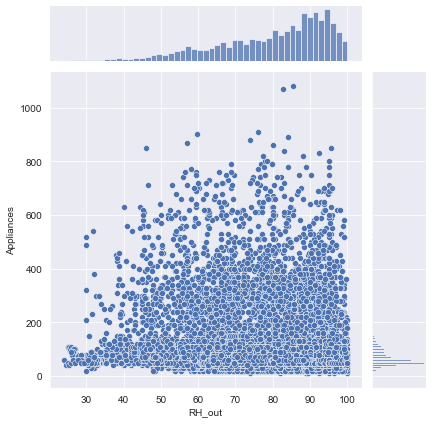

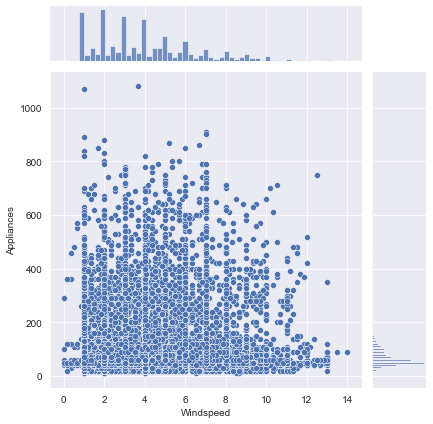

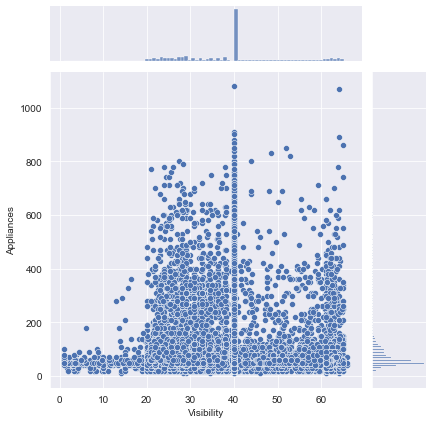

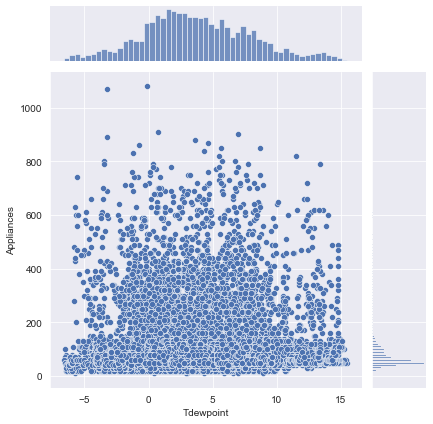

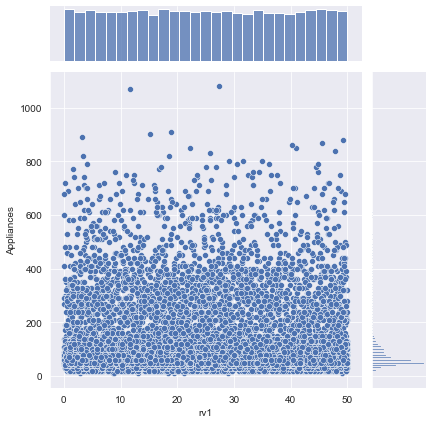

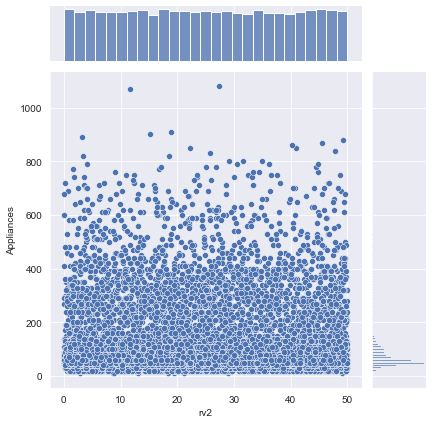

In [8]:
# This is a form of bivarariate analysis, creating plots of each column to the target column to see their relationship
# And from the plots, a lot of features had very little to no linear relationship with the target variable.
for i in [col for col in app_energy.columns if col != "Appliances"]:
    sns.jointplot(x = i, y = "Appliances", data = app_energy)

In [9]:
# This is to see variable's correlation with one another 
app_corr = app_energy.corr()
app_corr

Appliances        T1      RH_1        T2      RH_2        T3  \
Appliances     1.000000  0.055447  0.086031  0.120073 -0.060465  0.085060   
T1             0.055447  1.000000  0.164006  0.836834 -0.002509  0.892402   
RH_1           0.086031  0.164006  1.000000  0.269839  0.797535  0.253230   
T2             0.120073  0.836834  0.269839  1.000000 -0.165610  0.735245   
RH_2          -0.060465 -0.002509  0.797535 -0.165610  1.000000  0.137319   
T3             0.085060  0.892402  0.253230  0.735245  0.137319  1.000000   
RH_3           0.036292 -0.028550  0.844677  0.121497  0.678326 -0.011234   
T4             0.040281  0.877001  0.106180  0.762066 -0.047304  0.852778   
RH_4           0.016965  0.097861  0.880359  0.231563  0.721435  0.122737   
T5             0.019760  0.885247  0.205797  0.720550  0.110409  0.888169   
RH_5           0.006955 -0.014782  0.303258  0.029595  0.250271 -0.066355   
T6             0.117638  0.654769  0.316141  0.801186 -0.009670  0.686882   
RH_6          -0.083178 -0.615045  0.245126 -0.580372  0.389933 -0.647672   
T7             0.025801  0.838705  0.021397  0.663660 -0.051422  0.847374   
RH_7          -0.055642  0.135182  0.801122  0.229212  0.690584  0.172624   
T8             0.039572  0.825413 -0.030053  0.578191 -0.041023  0.795283   
RH_8          -0.094039 -0.006441  0.736196  0.068534  0.679777  0.044427   
T9             0.010010  0.844777  0.115263  0.675535  0.054544  0.901324   
RH_9          -0.051462  0.071756  0.764001  0.157346  0.676467  0.134602   
T_out          0.099155  0.682846  0.340767  0.792255  0.033674  0.699417   
Press_mm_hg   -0.034885 -0.150574 -0.293957 -0.133028 -0.255646 -0.189974   
RH_out        -0.152282 -0.345481  0.274126 -0.505291  0.584911 -0.281718   
Windspeed      0.087122 -0.087654  0.204932  0.052495  0.069190 -0.100776   
Visibility     0.000230 -0.076210 -0.021057 -0.069721 -0.005368 -0.102310   
Tdewpoint      0.015353  0.571309  0.639106  0.582602  0.499152  0.645886   
rv1           -0.011145 -0.006203 -0.000699 -0.011087  0.006275 -0.005194   
rv2           -0.011145 -0.006203 -0.000699 -0.011087  0.006275 -0.005194   

                 RH_3        T4      RH_4        T5  ...        T9      RH_9  \
Appliances   0.036292  0.040281  0.016965  0.019760  ...  0.010010 -0.051462   
T1          -0.028550  0.877001  0.097861  0.885247  ...  0.844777  0.071756   
RH_1         0.844677  0.106180  0.880359  0.205797  ...  0.115263  0.764001   
T2           0.121497  0.762066  0.231563  0.720550  ...  0.675535  0.157346   
RH_2         0.678326 -0.047304  0.721435  0.110409  ...  0.054544  0.676467   
T3          -0.011234  0.852778  0.122737  0.888169  ...  0.901324  0.134602   
RH_3         1.000000 -0.140457  0.898978 -0.050062  ... -0.195270  0.833538   
T4          -0.140457  1.000000 -0.048650  0.871813  ...  0.889439 -0.025549   
RH_4         0.898978 -0.048650  1.000000  0.091812  ... -0.044518  0.856591   
T5          -0.050062  0.871813  0.091812  1.000000  ...  0.911055  0.072308   
RH_5         0.375422 -0.076489  0.352591  0.032786  ... -0.138509  0.272197   
T6           0.076833  0.652350  0.259047  0.629161  ...  0.667177  0.184424   
RH_6         0.514912 -0.703149  0.392178 -0.632384  ... -0.738940  0.391943   
T7          -0.250090  0.877763 -0.131204  0.870624  ...  0.944776 -0.077690   
RH_7         0.832685  0.043527  0.894301  0.148905  ...  0.028055  0.858686   
T8          -0.283228  0.796256 -0.167066  0.824981  ...  0.869338 -0.156820   
RH_8         0.828822 -0.095192  0.847259  0.016388  ... -0.113014  0.855812   
T9          -0.195270  0.889439 -0.044518  0.911055  ...  1.000000 -0.008683   
RH_9         0.833538 -0.025549  0.856591  0.072308  ... -0.008683  1.000000   
T_out        0.118207  0.663478  0.293289  0.651321  ...  0.668220  0.223270   
Press_mm_hg -0.233274 -0.075292 -0.250748 -0.170999  ... -0.156828 -0.183739   
RH_out       0.356192 -0.388602  0.336813 -0.273953  ... -0.318848  0.359377   
Windspeed    0.2

In [10]:
# This cell of code was to sift out variables with high correlations with one another, higher than a particular threshold
# All to reduce multicollinearity which negates the assumptions of linear regression models
# And then I created a list of those variables that had satistfied the threshold
list_corr = []
for i in app_energy.corr().index:
    for j in app_energy.corr().columns:
        if i == j:
            continue
        else:
            if abs(app_energy.corr()[i][j]) > 0.8:
                list_corr.append([i,j])
                
list_corr_copy = list_corr.copy()
for i in list_corr_copy:
    if i[::-1] in list_corr:
        list_corr.remove(i)

In [11]:
# The list of highly correlated variables
list_corr

[['T2', 'T1'],
 ['T3', 'T1'],
 ['RH_3', 'RH_1'],
 ['T4', 'T1'],
 ['T4', 'T3'],
 ['RH_4', 'RH_1'],
 ['RH_4', 'RH_3'],
 ['T5', 'T1'],
 ['T5', 'T3'],
 ['T5', 'T4'],
 ['T6', 'T2'],
 ['T7', 'T1'],
 ['T7', 'T3'],
 ['T7', 'T4'],
 ['T7', 'T5'],
 ['RH_7', 'RH_1'],
 ['RH_7', 'RH_3'],
 ['RH_7', 'RH_4'],
 ['T8', 'T1'],
 ['T8', 'T5'],
 ['T8', 'T7'],
 ['RH_8', 'RH_3'],
 ['RH_8', 'RH_4'],
 ['RH_8', 'RH_7'],
 ['T9', 'T1'],
 ['T9', 'T3'],
 ['T9', 'T4'],
 ['T9', 'T5'],
 ['T9', 'T7'],
 ['T9', 'T8'],
 ['RH_9', 'RH_3'],
 ['RH_9', 'RH_4'],
 ['RH_9', 'RH_7'],
 ['RH_9', 'RH_8'],
 ['T_out', 'T6'],
 ['rv2', 'rv1']]

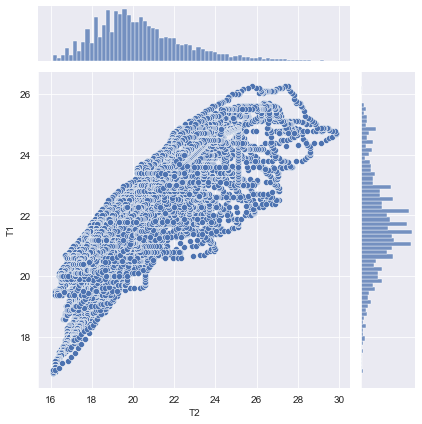

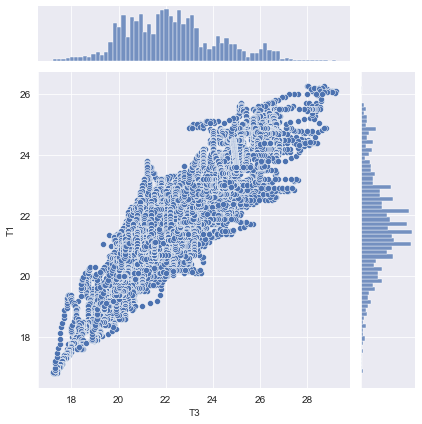

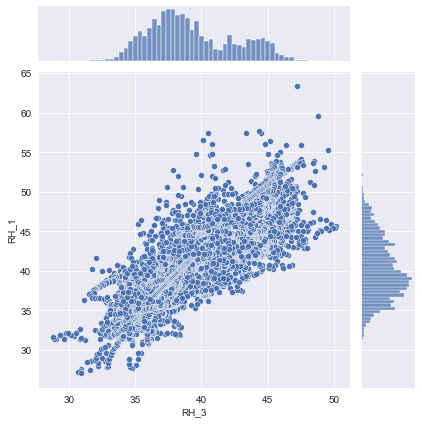

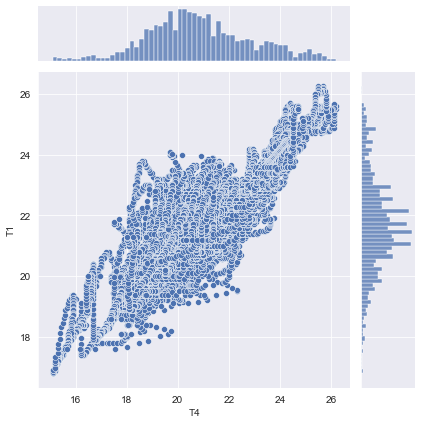

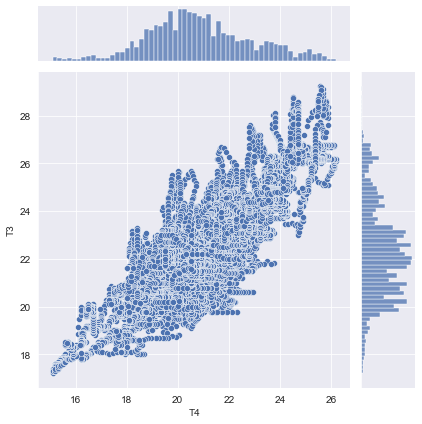

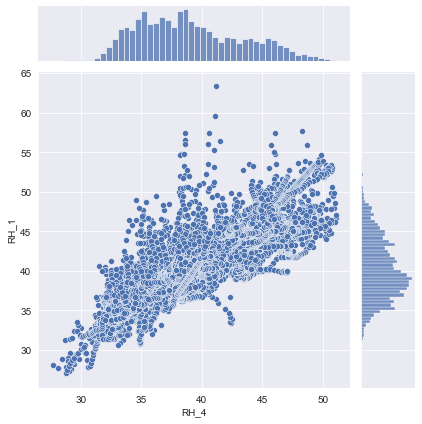

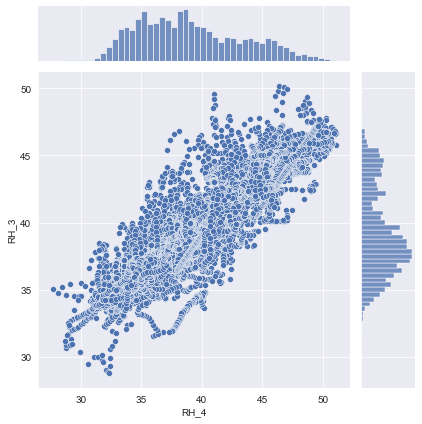

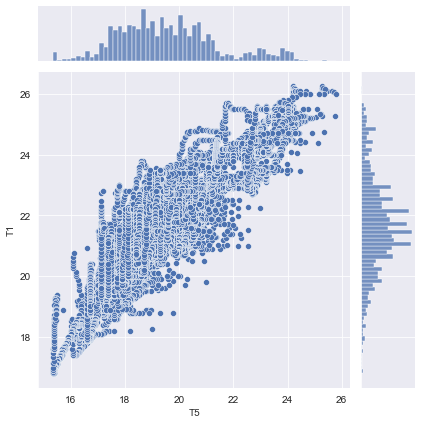

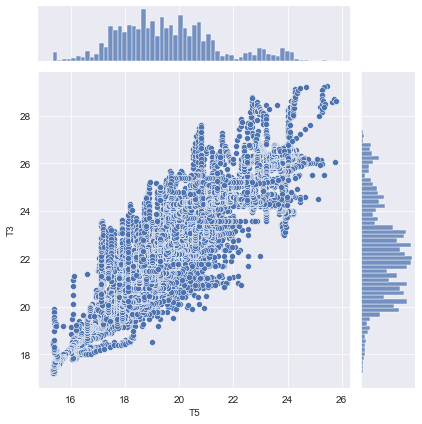

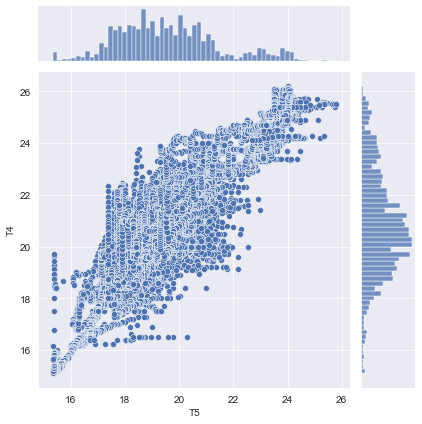

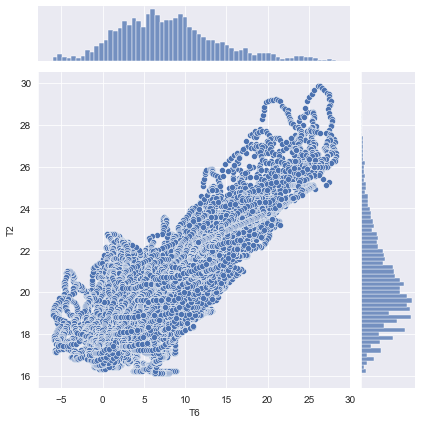

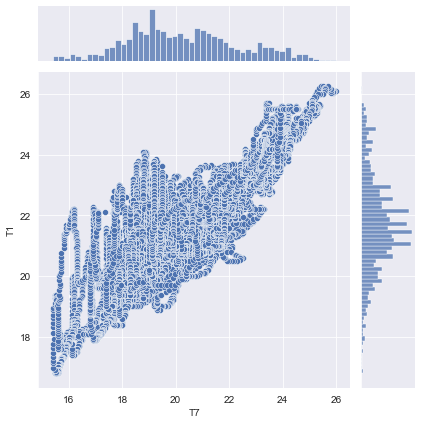

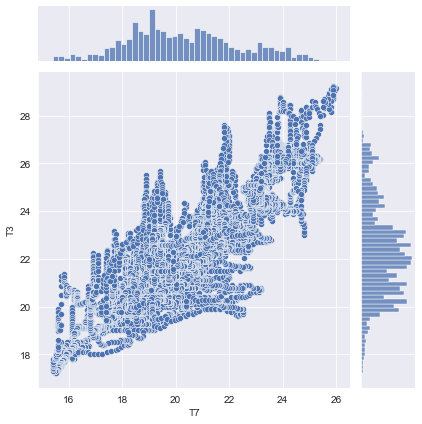

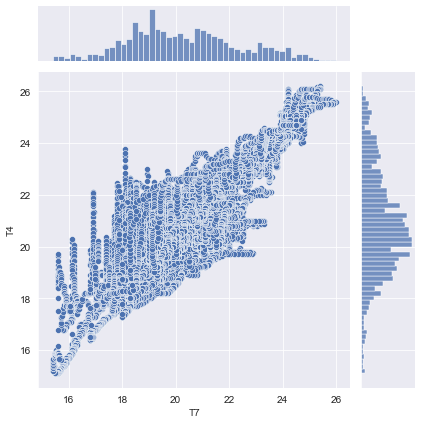

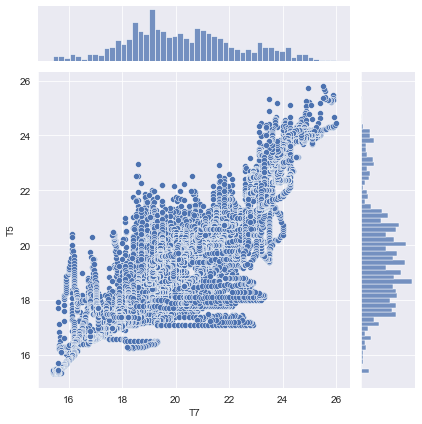

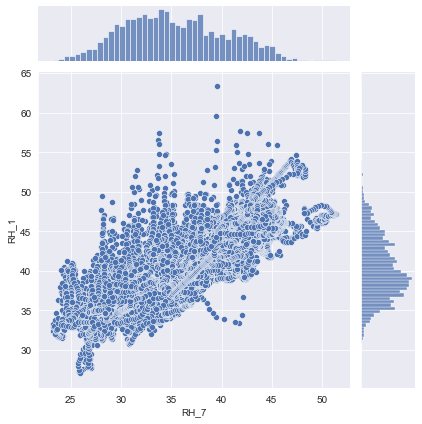

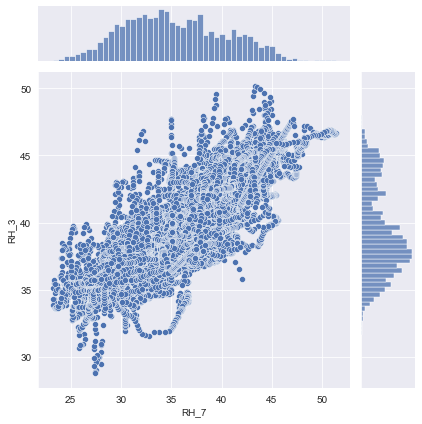

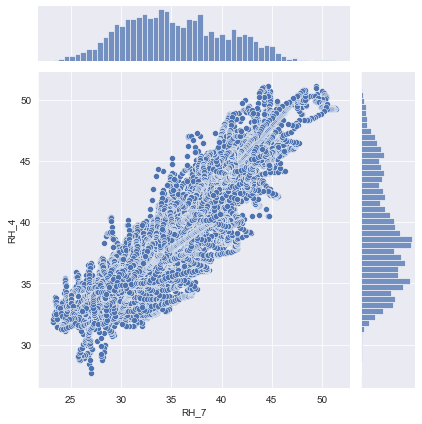

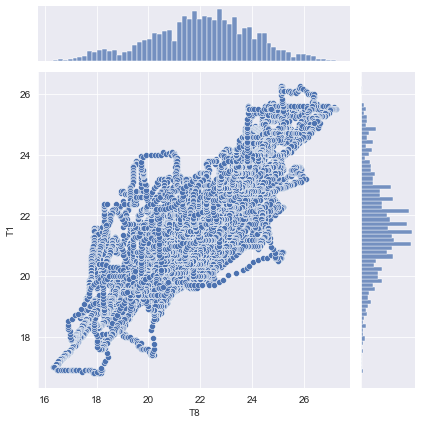

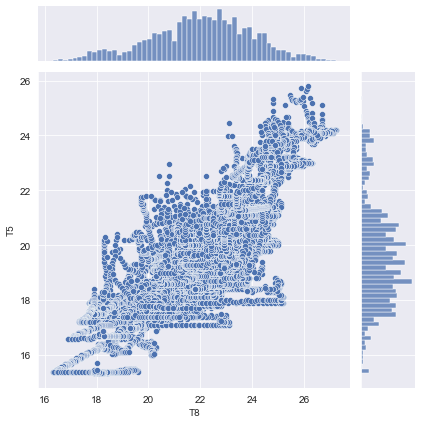

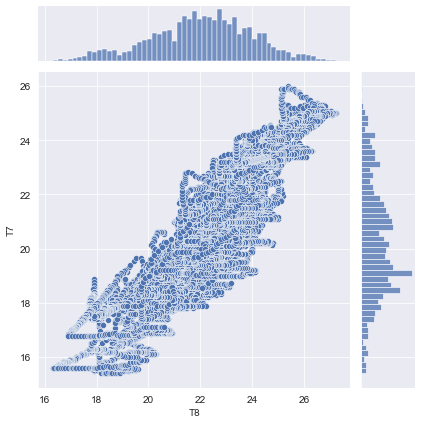

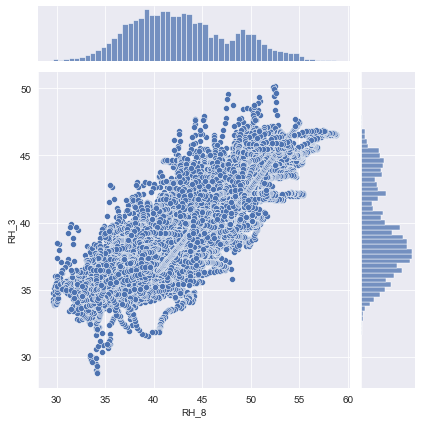

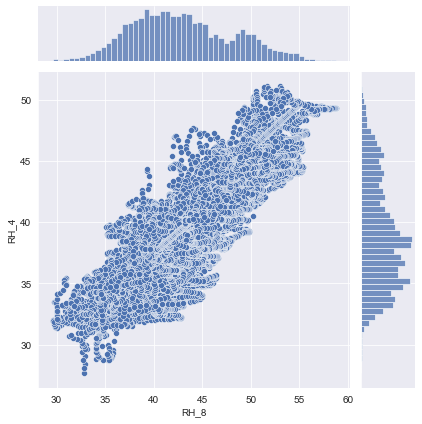

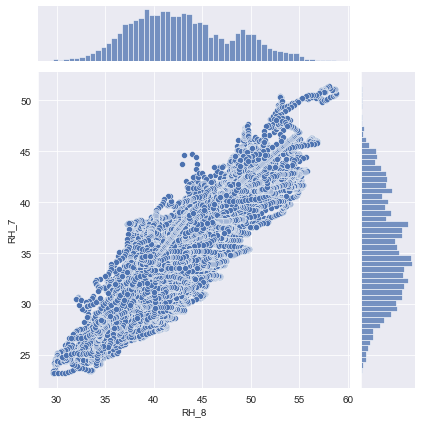

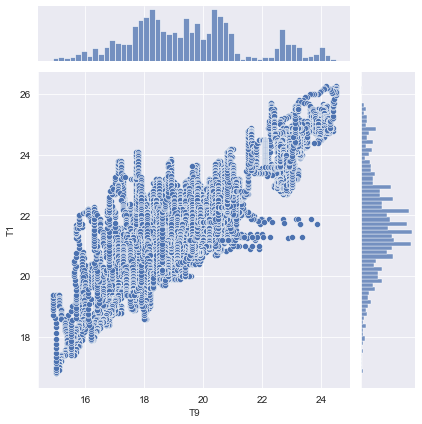

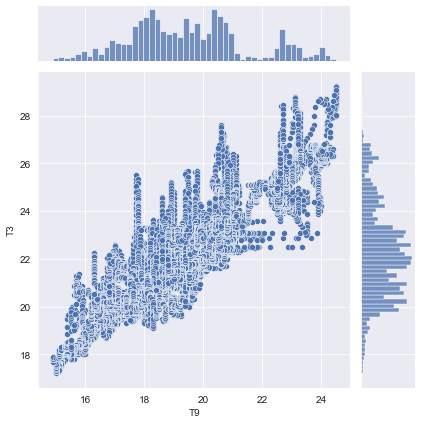

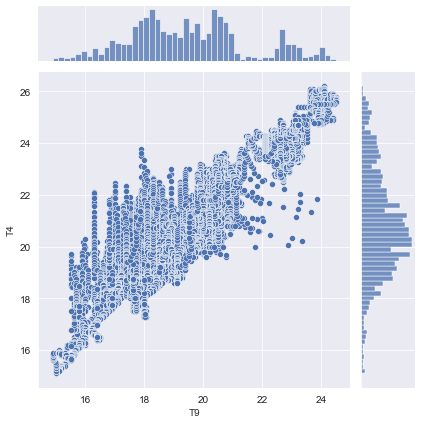

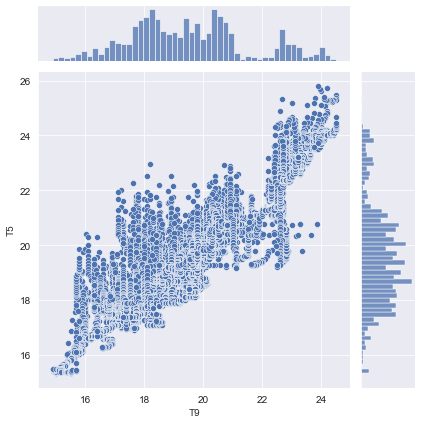

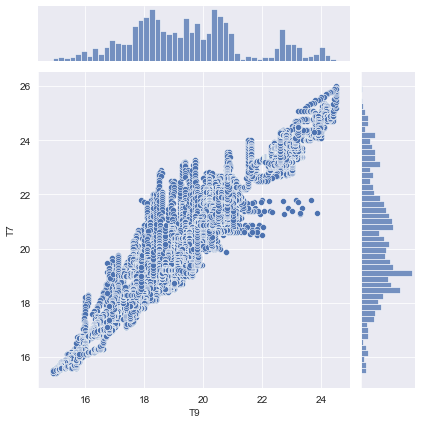

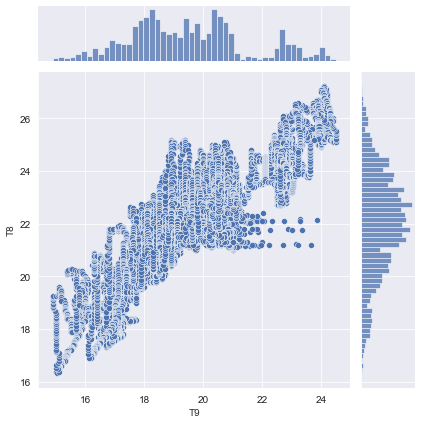

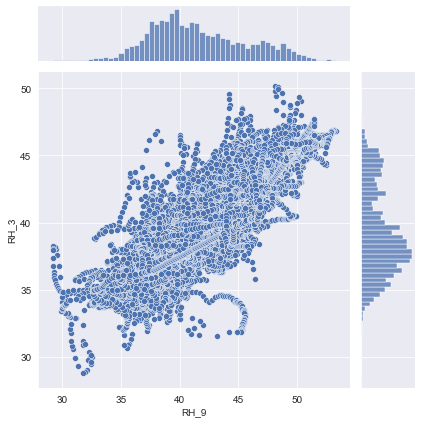

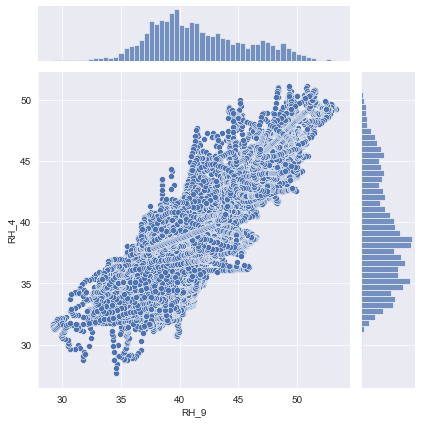

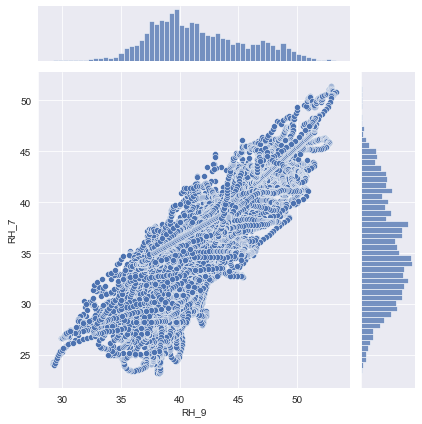

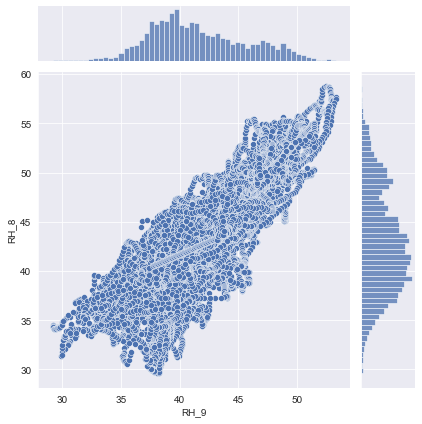

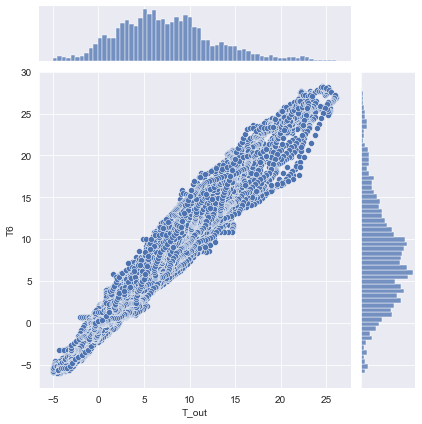

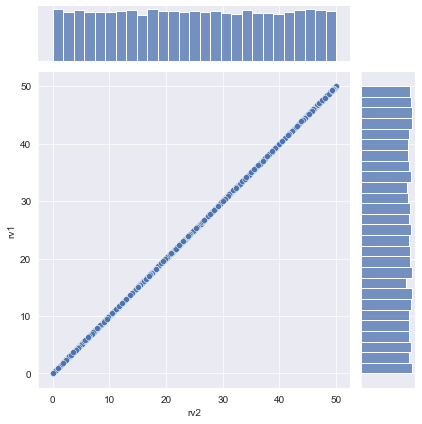

In [12]:
# These plots were to visualise the relationship between those highly correlated variables and from those plots, 
# We can see a highly linear relationship with one another, 
# hence only one of these variables would be chosen during featue engineering process.
for items in list_corr:
    a = items[0]
    b = items[1]
    sns.jointplot(x = a, y = b, data = app_energy)

<AxesSubplot:>

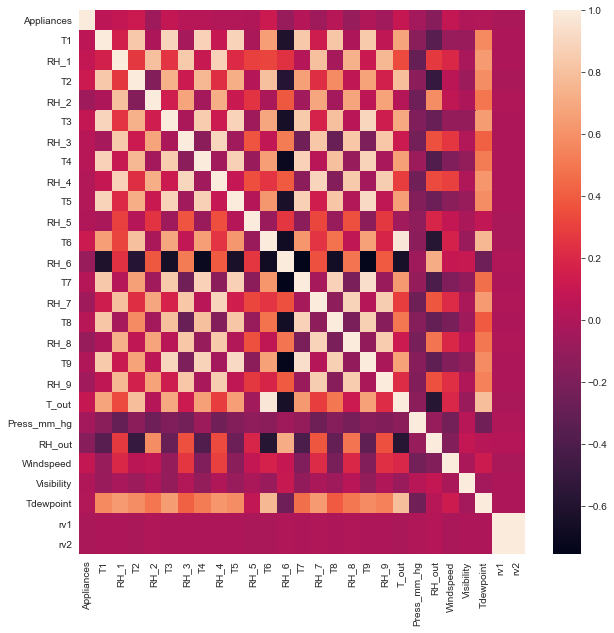

In [13]:
# An heatmap visualizing the correlation matrix
sns.heatmap(app_energy.corr())

In [14]:
# Scaling the data using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
scaled_data = Scaler.fit_transform(app_energy)
app_energy = pd.DataFrame(scaled_data, columns = app_energy.columns)

In [36]:
app_energy.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [15]:
app_energy.head()

Appliances       T1      RH_1        T2      RH_2        T3      RH_3  \
0    0.046729  0.32735  0.566187  0.225345  0.684038  0.215188  0.746066   
1    0.046729  0.32735  0.541326  0.225345  0.682140  0.215188  0.748871   
2    0.037383  0.32735  0.530502  0.225345  0.679445  0.215188  0.755569   
3    0.037383  0.32735  0.524080  0.225345  0.678414  0.215188  0.758685   
4    0.046729  0.32735  0.531419  0.225345  0.676727  0.215188  0.758685   

         T4      RH_4        T5  ...        T9      RH_9     T_out  \
0  0.351351  0.764262  0.175506  ...  0.223032  0.677290  0.372990   
1  0.351351  0.782437  0.175506  ...  0.226500  0.678532  0.369239   
2  0.344745  0.778062  0.175506  ...  0.219563  0.676049  0.365488   
3  0.341441  0.770949  0.175506  ...  0.219563  0.671909  0.361736   
4  0.341441  0.762697  0.178691  ...  0.219563  0.671909  0.357985   

   Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint       rv1       rv2  
0     0.097674  0.894737   0.500000    0.953846   0.538462  0.265449  0.265449  
1     0.100000  0.894737   0.476190    0.894872   0.533937  0.372083  0.372083  
2     0.102326  0.894737   0.452381    0.835897   0.529412  0.572848  0.572848  
3     0.104651  0.894737   0.428571    0.776923   0.524887  0.908261  0.908261  
4     0.106977  0.894737   0.404762    0.717949   0.520362  0.201611  0.201611  

[5 rows x 27 columns]

In [16]:
# Splitting the data into training and testing sets and the variables into features and targets
from sklearn.model_selection import train_test_split, GridSearchCV

X = app_energy[[i for i in app_energy.columns if i != "Appliances"]]
y = app_energy["Appliances"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [62]:
# Linear model and testing metrics on the model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_preds = lin_reg_model.predict(X_test)


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_lin = r2_score(y_test, lin_preds)
mse_lin = mean_squared_error(y_test, lin_preds)
rmse_lins = np.sqrt(mse_lin)
mab_lins = mean_absolute_error(y_test, lin_preds)

In [49]:
lin_preds

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [55]:
# residual sum of squares of linear_model
rss_1 = np.sum((y_test - lin_preds) ** 2)

In [56]:
rss_1

45.34762967266378

In [59]:
# Root mean squared error of linear function
rmse_lins

0.08751444947661711

In [18]:
# r2_score of the linear regression model
r2_lin

0.14890246319303524

In [19]:
# Mean Squared Error of the linear regression model
mse_lin

0.007658778867195369

In [61]:
# Mean absolute error of linear model
mab_lins

0.05013362397742957

In [63]:
coef = pd.Series(lin_reg_model.coef_, index = X.columns)
coef.sort_values(ascending = False)

RH_1           0.553547
T3             0.290627
T6             0.236425
Tdewpoint      0.117758
T8             0.101995
RH_3           0.096048
RH_6           0.038049
Windspeed      0.029183
T4             0.028981
RH_4           0.026386
RH_5           0.016006
Visibility     0.012307
T7             0.010319
Press_mm_hg    0.006839
rv2            0.000770
rv1            0.000770
T1            -0.003281
T5            -0.015657
RH_9          -0.039800
RH_7          -0.044614
RH_out        -0.077671
RH_8          -0.157595
T9            -0.189941
T2            -0.236178
T_out         -0.321860
RH_2          -0.456698
dtype: float64

## Linear model btw T2 and T6 columns

In [20]:
# A linear model of dependent variable T2 and the independent variable T6, for the test question
a = X[["T2"]]
b = X["T6"]
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size = 0.3, random_state = 42)

lin_reg = LinearRegression()
lin_reg.fit(a_train, b_train)
ln_pred = lin_reg.predict(a_test)


r2 = r2_score(b_test, ln_pred)
mab = mean_absolute_error(a_test, ln_pred)
root_mse = np.sqrt(mean_squared_error(a_test, ln_pred))

In [21]:
root_mse

0.09968873867207462

In [22]:
r2, mab

(0.6427789637197382, 0.09817011382318283)

In [23]:
(mean_squared_error(a_test, ln_pred)) * len(ln_pred)

58.841977983350816

## Ridge Model

<AxesSubplot:>

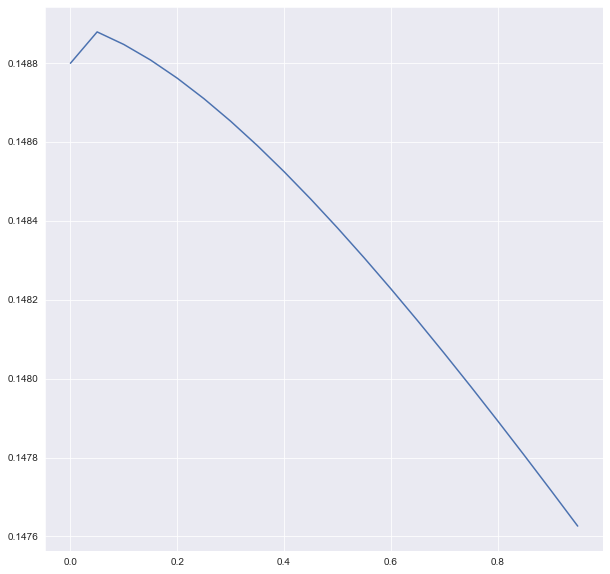

In [24]:
# A form of hyper-parameter tuning for the alpha parameter of the Ridge model
ridge_scores = []
for i in np.arange(0,1,0.05):
    ridge_model = Ridge(alpha = i)
    ridge_model.fit(X_train, y_train)
    ridge_preds = ridge_model.predict(X_test)
    r2_ridge = r2_score(y_test, ridge_preds)
    ridge_scores.append(r2_ridge)

    
sns.lineplot(x = np.arange(0,1,0.05), y = ridge_scores)
# mse_ridge = mean_squared_error(y_test, ridge_preds)

In [25]:
# Training the model with the alpha with the maximum r2_score
ridge_model = Ridge(alpha = 0.01)
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, ridge_preds)
r2_ridge

0.14889852394635106

In [26]:
mse_ridge = mean_squared_error(y_test, ridge_preds)
mse_ridge

0.007658814315329046

In [27]:
# a form of corsscheck with GridSearchCV
params = {"alpha": np.arange(0.01,0.05,0.001)}
grid = GridSearchCV(Ridge(), params, cv = 5, scoring = "accuracy", n_jobs = -1)
grid.fit(X_train, y_train)
grid_ridge = grid.best_estimator_
print(f"Best Param is {grid.best_params_}")

grid_ridge.fit(X_train, y_train)
new_ridge_preds = grid_ridge.predict(X_test)
new_ridge_score = r2_score(y_test, new_ridge_preds)
print(f"The new_ridge_score is {new_ridge_score}")

Best Param is {'alpha': 0.01}
The new_ridge_score is 0.14889852394635106


### Answering ridge model questions

In [28]:
# Answering the test question
rdg_model = Ridge(alpha = 0.4)
rdg_model.fit(X_train, y_train)
rdg_preds = rdg_model.predict(X_test)
rdg_preds_tr = rdg_model.predict(X_train)
r2_rdg = np.sqrt(mean_squared_error(y_test, rdg_preds))
r2_rdg_tr = np.sqrt(mean_squared_error(y_train, rdg_preds_tr))

r2_rdg,r2_rdg_tr

(0.08753385704628003, 0.08899770418364146)

In [29]:
lss_model = Lasso(alpha = 0.001)
lss_model.fit(X_train, y_train)
lss_preds = lss_model.predict(X_test)
r2_lss = np.sqrt(mean_squared_error(y_test, lss_preds))
r2_lss

0.09358170467245137

In [30]:
lss_model.coef_
lss_model.coef_[np.where(lss_model.coef_ != 0)]

array([ 0.01787993, -0.00011004, -0.04955749,  0.00291176])

## Personal Feature selection 

In [31]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.tree import ExtraTreeRegressor

In [32]:
feats = SelectKBest(score_func = f_regression, k = 10)
feats.fit(X,y)
X_new = pd.Series(feats.scores_, index = [i for i in X.columns if i != "Appliances"])
X_new.nlargest(10).index

Index(['RH_out', 'T2', 'T6', 'T_out', 'RH_8', 'Windspeed', 'RH_1', 'T3',
       'RH_6', 'RH_2'],
      dtype='object')

In [33]:
mutual_info = mutual_info_regression(X,y, random_state = 10)
mutual_feats = pd.Series(mutual_info, index = [i for i in X.columns if i != "Appliances"])
mutual_feats.sort_values(ascending = True)
mutual_feats.nlargest(10).index

Index(['T9', 'T5', 'RH_6', 'T3', 'T8', 'T4', 'T7', 'T1', 'T6', 'RH_1'], dtype='object')

In [34]:
X_training = X[['RH_out', 'T2', 'T6', 'T_out', 'RH_8', 'Windspeed', 'RH_1', 'T3',
                'RH_6', 'RH_2']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_training, y, test_size = 0.3, random_state = 42)

lin_reg_model_new = LinearRegression()
lin_reg_model_new.fit(X_train1, y_train1)
lin_preds_new = lin_reg_model_new.predict(X_test1)
r2_lin_new  = r2_score(y_test, lin_preds_new)
r2_lin_new

0.12146983751083451

In [35]:
ridge_model = Ridge(alpha = 0.01)
ridge_model.fit(X_train1, y_train1)
ridge_preds_new = ridge_model.predict(X_test1)
r2_ridge_new = r2_score(y_test1, ridge_preds_new)
r2_ridge_new

0.12147284369903721